#Dataset Description

\

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

##1. Data Cleaning

### Read the dataset

In [ ]:
df=pd.read_csv("Task (1) Dataset.csv")

In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df.shape

(12316, 32)

In [ ]:
df["Pedestrian_movement"].value_counts()

Pedestrian_movement
Not a Pedestrian                                                                                                                         9537
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                             282
Unknown or other                                                                                                                          252
Crossing from driver's nearside                                                                                                           120
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                              60
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                             42
Walking along in carriageway, back to traffic                                                                                   

### Handle Missing Values

In [ ]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [ ]:
#filling na with mode or Unknown


df["Educational_level"]=df["Educational_level"].fillna(df["Educational_level"].mode()[0])
df["Fitness_of_casuality"]=df["Fitness_of_casuality"].fillna(df["Fitness_of_casuality"].mode()[0])
df["Type_of_vehicle"]=df["Type_of_vehicle"].fillna(df["Type_of_vehicle"].mode()[0])
df["Owner_of_vehicle"]=df["Owner_of_vehicle"].fillna(df["Owner_of_vehicle"].mode()[0])
df["Road_surface_type"]=df["Road_surface_type"].fillna(df["Road_surface_type"].mode()[0])
df["Vehicle_movement"]=df["Vehicle_movement"].fillna(df["Vehicle_movement"].mode()[0])
df["Road_allignment"]=df["Road_allignment"].fillna(df["Road_allignment"].mode()[0])


df["Vehicle_driver_relation"]=df["Vehicle_driver_relation"].fillna("Unknown")
df["Work_of_casuality"]=df["Work_of_casuality"].fillna("Unknown")
df["Type_of_collision"]=df["Type_of_collision"].fillna("Unknown")

In [ ]:
#dropping columns

df.drop("Defect_of_vehicle",axis=1,inplace=True)
df.drop("Service_year_of_vehicle",axis=1,inplace=True)
df.drop("Area_accident_occured",axis=1,inplace=True)


In [ ]:
#droping some rows
df=df[df["Driving_experience"].notna()]
df=df[df["Types_of_Junction"].notna()]
df=df[df["Lanes_or_Medians"].notna()]

In [ ]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

### Correct any inconsistent data entries.

In [ ]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_severity              object
Work_of_casuality              object
Fitness_of_casuality           object
Pedestrian_m

In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Lanes_or_Medians,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Undivided Two way,...,Going straight,na,na,na,na,Unknown,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,other,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,other,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,other,...,Going straight,na,na,na,na,Unknown,Normal,Not a Pedestrian,Overtaking,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Undivided Two way,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury


### Ensure data types are appropriate for each column.

---



In [ ]:
l=LabelEncoder()
df["Accident_severity_numbers"]=l.fit_transform(df["Accident_severity"])
df["Age_band_of_driver_number"]=l.fit_transform(df["Age_band_of_driver"])

In [ ]:
df["Type_of_vehicle"].value_counts()

Type_of_vehicle
Automobile              3454
Lorry (41?100Q)         1842
Other                   1020
Pick up upto 10Q         680
Public (12 seats)        598
Stationwagen             561
Lorry (11?40Q)           457
Public (13?45 seats)     456
Public (> 45 seats)      346
Long lorry               324
Taxi                     220
Motorcycle               156
Special vehicle           69
Ridden horse              57
Turbo                     43
Bajaj                     27
Bicycle                   16
Name: count, dtype: int64

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10326 entries, 1 to 12315
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         10326 non-null  object
 1   Day_of_week                  10326 non-null  object
 2   Age_band_of_driver           10326 non-null  object
 3   Sex_of_driver                10326 non-null  object
 4   Educational_level            10326 non-null  object
 5   Vehicle_driver_relation      10326 non-null  object
 6   Driving_experience           10326 non-null  object
 7   Type_of_vehicle              10326 non-null  object
 8   Owner_of_vehicle             10326 non-null  object
 9   Lanes_or_Medians             10326 non-null  object
 10  Road_allignment              10326 non-null  object
 11  Types_of_Junction            10326 non-null  object
 12  Road_surface_type            10326 non-null  object
 13  Road_surface_conditions      10326 n

### Identify and analyze patterns in the data.

In [ ]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity_numbers,Age_band_of_driver_number
count,10326.000000,10326.000000,10326.000000,10326.000000
mean,2.039125,1.552779,1.836432,1.312803
std,0.678711,1.018508,0.401056,1.351804
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,0.000000
50%,2.000000,1.000000,2.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000
max,7.000000,8.000000,2.000000,4.000000


In [ ]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Accident_severity_numbers',
       'Age_band_of_driver_number'],
      dtype='object')

In [ ]:
df[["Type_of_vehicle","Age_band_of_driver"]].value_counts()

### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

In [ ]:
k=df[["Type_of_vehicle","Age_band_of_driver"]].value_counts()
k.to_frame()

count
Type_of_vehicle Age_band_of_driver       
Automobile      18-30                1201
                31-50                1123
Lorry (41?100Q) 18-30                 645
                31-50                 641
Automobile      Unknown               454
...                                   ...
Bicycle         31-50                   3
Turbo           Over 51                 3
                Under 18                3
Bajaj           Under 18                2
Bicycle         Under 18                2

[84 rows x 1 columns]

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


In [ ]:
k=df[["Age_band_of_driver","Accident_severity"]].value_counts()

In [ ]:
new_index=[]
for i in k.index:
  new_index.append(i[0]+" "+i[1])

<Axes: >

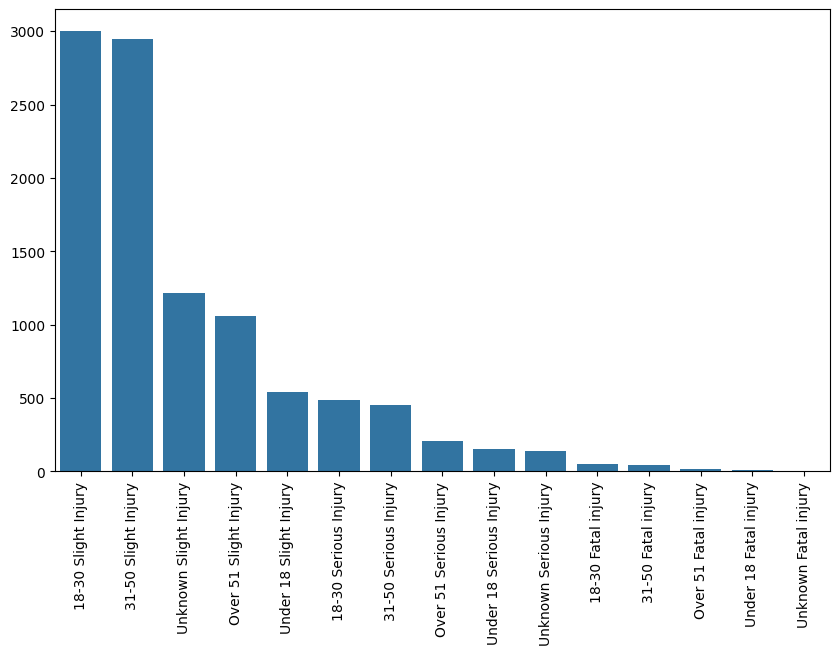

In [ ]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)

sns.barplot(x=new_index,y=k.values)

## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

([<matplotlib.patches.Wedge at 0x7bae2483eef0>,
 [Text(0.5213565283095057, 0.9686007280551981, '18-30'),
  Text(-1.0981042152365452, -0.06455333050843523, '31-50'),
  Text(-0.05686764858418973, -1.098529048566539, 'Unknown'),
  Text(0.7524552058365367, -0.8023784413912773, 'Over 51'),
  Text(1.0750777490582522, -0.2328257577671378, 'Under 18')],
 [Text(0.28437628816882127, 0.5283276698482898, '34.3%'),
  Text(-0.59896593558357, -0.03521090755005558, '33.3%'),
  Text(-0.03101871740955803, -0.5991976628544757, '13.2%'),
  Text(0.4104301122744745, -0.43766096803160576, '12.4%'),
  Text(0.5864060449408648, -0.12699586787298425, '6.8%')])

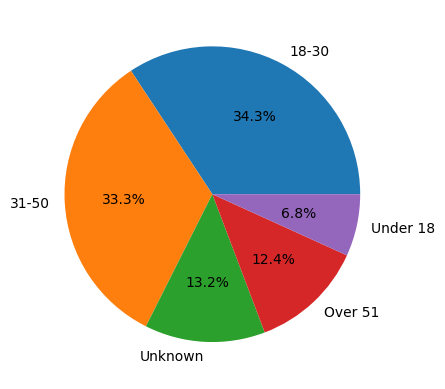

In [ ]:
plt.pie(df["Age_band_of_driver"].value_counts().values,labels=df["Age_band_of_driver"].value_counts().index,autopct="%0.1f%%")

<BarContainer object of 3 artists>

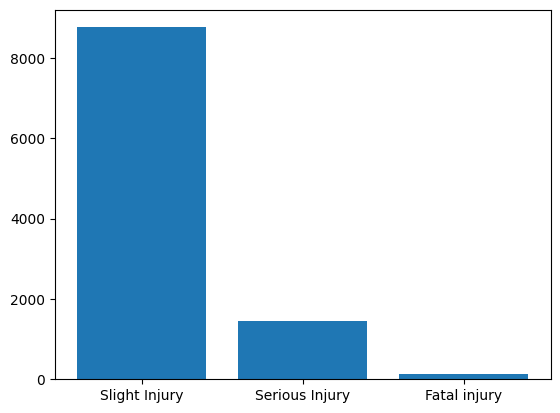

In [ ]:
plt.bar(df["Accident_severity"].value_counts().index,df["Accident_severity"].value_counts().values)

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

The data has a lot of missing values. The age group is too large; it would be better to categorize it into 18-22, 23-27, 28-32, etc. This categorization will help identify the age group that causes accidents the most. There are some columns that will not be needed because they are not relevant to our task.

Most of the data is text and needs much more cleaning.